## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.

mees = len(mouse_data['Mouse ID'].value_counts())
print(f'There are a total of {mees} mice.')

There are a total of 249 mice.


In [3]:
#find duplicates by 2 columns pandas df (google) --> this is useful for answering the below q

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#what mouse ID has the duplicate data
#print mice that have duplicate data
#get mouse ID first
#DROP MICE ROWS THAT HAVE DUPLICATE IDS AND TIMEPOINTS
#should only end up droping a few
duplicate_mice = mouse_data[mouse_data.duplicated()]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_data[mouse_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data = mouse_data.drop_duplicates(['Mouse ID','Timepoint'])
mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouses = len(mice_data['Mouse ID'].value_counts())
print(f'There are a total of {mouses} mice.')

There are a total of 249 mice.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_stats = mice_data.set_index("Drug Regimen")
tumor_regimen_stats = pd.DataFrame(regimen_stats.loc[:,"Tumor Volume (mm3)"])
tumor_regimen_stats

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,45.000000
Ramicane,38.825898
Ramicane,35.014271
Ramicane,34.223992
Ramicane,32.997729
...,...
Naftisol,63.145652
Naftisol,65.841013
Naftisol,69.176246


In [9]:
mean_tumor = tumor_regimen_stats.groupby(["Drug Regimen"]).mean()
median_tumor = tumor_regimen_stats.groupby(["Drug Regimen"]).median()
var_tumor = tumor_regimen_stats.groupby(["Drug Regimen"]).var()
std_tumor = tumor_regimen_stats.groupby(["Drug Regimen"]).std()
sem_tumor = tumor_regimen_stats.groupby(["Drug Regimen"]).sem()

one_df = pd.merge(mean_tumor,median_tumor,on=["Drug Regimen"])
one_true_df = one_df.rename(columns = {'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median'})

two_df = pd.merge(one_true_df,var_tumor,on=["Drug Regimen"])
two_true_df = two_df.rename(columns = {'Tumor Volume (mm3)':'Var'})

three_df = pd.merge(two_true_df,std_tumor,on=["Drug Regimen"])
three_true_df = three_df.rename(columns = {'Tumor Volume (mm3)':'StDev'})

four_df = pd.merge(three_true_df,sem_tumor,on=["Drug Regimen"])
final_df = four_df.rename(columns = {'Tumor Volume (mm3)':'SEM'})

final_df.sort_values('Mean')

,Mean,Median,Var,StDev,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


# Bar Plots

Text(0, 0.5, 'Number of Data Points')

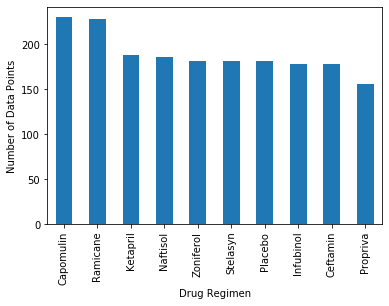

In [10]:
# Generate a bar plot showing the number of mice per time point for each 
#treatment throughout the course of the study using pandas. 
total_mice = mice_data.groupby(['Drug Regimen'])["Mouse ID"].count()

mice_pandas = total_mice.sort_values(ascending=False).plot.bar()
mice_pandas.set_ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

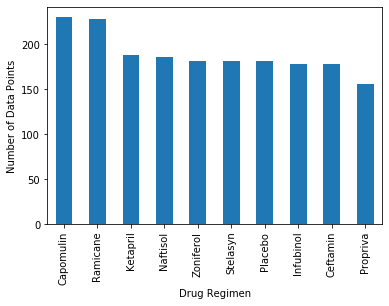

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
mice_matplotlib = total_mice.sort_values(ascending=False)
mice_matplotlib.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie Plots

In [12]:
mice_gender = mice_data.groupby(['Sex'])["Sex"].count()
mice_gender

Sex
Female    930
Male      958
Name: Sex, dtype: int64

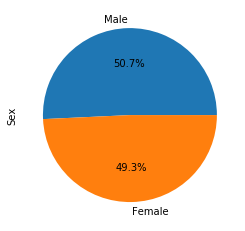

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
len(mice_data.groupby(["Sex"])["Mouse ID"].value_counts())
mice_gender = mice_data.groupby(['Sex'])["Sex"].count()
mice_gender.sort_values(ascending=False).plot.pie(autopct="%1.1f%%")

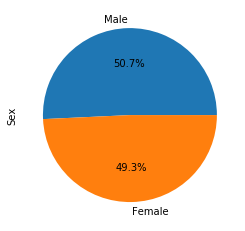

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice = mice_gender.sort_values(ascending=False)
gender_mice.plot(kind='pie',autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

mice_max = mice_data.groupby(["Mouse ID"]).max()
mice_max = mice_max.reset_index()
merged_data = mice_max[['Mouse ID','Timepoint']].merge(mice_data,on=['Mouse ID','Timepoint'],how="left")

infubinol = merged_data[merged_data["Drug Regimen"] == "Infubinol"]
infubinol = infubinol["Tumor Volume (mm3)"]

ramicane = merged_data[merged_data["Drug Regimen"] == "Ramicane"]
ramicane = ramicane["Tumor Volume (mm3)"]

naftisol = merged_data[merged_data["Drug Regimen"] == "Naftisol"]
naftisol = naftisol["Tumor Volume (mm3)"]

capomulin = merged_data[merged_data["Drug Regimen"] == "Capomulin"]
capomulin = capomulin["Tumor Volume (mm3)"]


In [95]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
infubinol_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = infubinol_quartiles[.25]
inf_upperq = infubinol_quartiles[.75]
inf_iqr = (inf_upperq-inf_lowerq).round(2)
inf_lb = (inf_lowerq - (1.5*inf_iqr)).round(2)
inf_ub = (inf_upperq + (1.5*inf_iqr)).round(2)

ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ramicane_quartiles[.25]
ram_upperq = ramicane_quartiles[.75]
ram_iqr = (ram_upperq-ram_lowerq).round(2)
ram_lb = (ram_lowerq - (1.5*ram_iqr)).round(2)
ram_ub = (ram_upperq + (1.5*ram_iqr)).round(2)

naftisol_quartiles = naftisol.quantile([.25,.5,.75])
naf_lowerq = naftisol_quartiles[.25]
naf_upperq = naftisol_quartiles[.75]
naf_iqr = (naf_upperq-naf_lowerq).round(2)
naf_lb = (naf_lowerq - (1.5*naf_iqr)).round(2)
naf_ub = (naf_upperq + (1.5*naf_iqr)).round(2)

capomulin_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = capomulin_quartiles[.25]
cap_upperq = capomulin_quartiles[.75]
cap_iqr = (cap_upperq-cap_lowerq).round(2)
cap_lb = (cap_lowerq - (1.5*cap_iqr)).round(2)
cap_ub = (cap_upperq + (1.5*cap_iqr)).round(2)

print(f"The interquartile range of Infubinol is: {inf_iqr}")
print(f"Values below {inf_lb} could be outliers.")
print(f"Values above {inf_ub} could be outliers.")
print(" ")
print(f"The interquartile range of Ramicane is: {ram_iqr}")
print(f"Values below {ram_lb} could be outliers.")
print(f"Values above {ram_ub} could be outliers.")
print(" ")
print(f"The interquartile range of Naftisol is: {naf_iqr}")
print(f"Values below {naf_lb} could be outliers.")
print(f"Values above {naf_ub} could be outliers.")
print(" ")
print(f"The interquartile range of Capomulin is: {cap_iqr}")
print(f"Values below {cap_lb} could be outliers.")
print(f"Values above {cap_ub} could be outliers.")
print(" ")

The interquartile range of Infubinol is: 11.48
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
 
The interquartile range of Ramicane is: 9.1
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
 
The interquartile range of Naftisol is: 17.48
Values below 25.86 could be outliers.
Values above 95.78 could be outliers.
 
The interquartile range of Capomulin is: 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
 


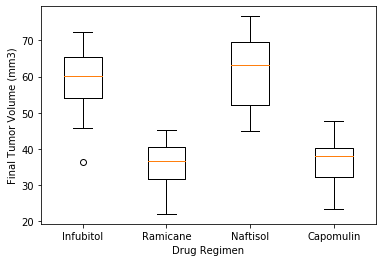

In [105]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drugs = [infubinol, ramicane, naftisol, capomulin]
fig1, ax = plt.subplots()
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(drugs)
ax.set_xticklabels(['Infubitol','Ramicane','Naftisol','Capomulin'])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

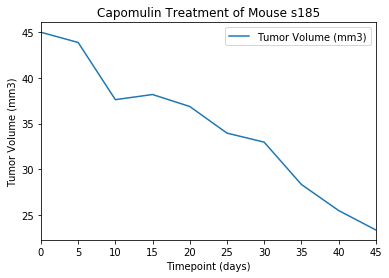

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap = mice_data.loc[mice_data["Drug Regimen"] == "Capomulin"]
mouse_cap = cap.loc[cap["Mouse ID"] == "s185"]
mosue_cap = mouse_cap.drop(columns=["Drug Regimen","Sex","Age_months","Weight (g)", "Metastatic Sites"])
m_cap = mosue_cap.set_index("Timepoint")
mouse_cap = m_cap.drop(columns="Mouse ID")
cap_plot = mouse_cap.plot(kind="line")
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Avg Tumor Volume (mm3)')

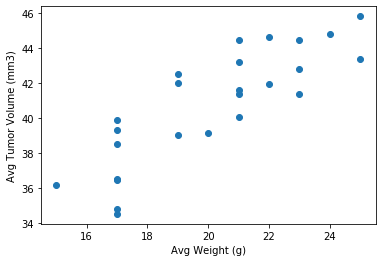

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
wwcap = cap.drop(columns = ["Drug Regimen","Sex","Age_months","Timepoint","Metastatic Sites"])
t_cap = wwcap.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
w_cap = wwcap.groupby(["Mouse ID"])["Weight (g)"].mean()
wt_merge = pd.merge(w_cap,t_cap,on="Mouse ID")
avg_scatter = plt.scatter(wt_merge["Weight (g)"],wt_merge["Tumor Volume (mm3)"])
plt.xlabel("Avg Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

## Correlation and Regression

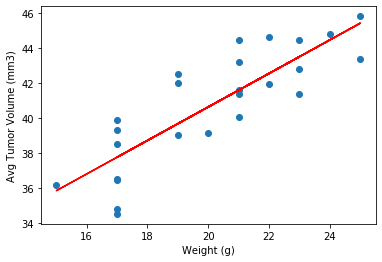

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = wt_merge["Weight (g)"]
y_values = wt_merge["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()